In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
Factors = pd.read_csv('../Factors/Factors.csv')
factors = ["Momentum_1m", "Momentum_2m", "Momentum_3m", "Turnover_1m", "Turnover_2m", "Turnover_3m", "Volatility_1m", "Volatility_2m", "Volatility_3m", "std_1m", "std_2m", "std_3m", "ROA", "ROE", "EP", "BP"]

<AxesSubplot:>

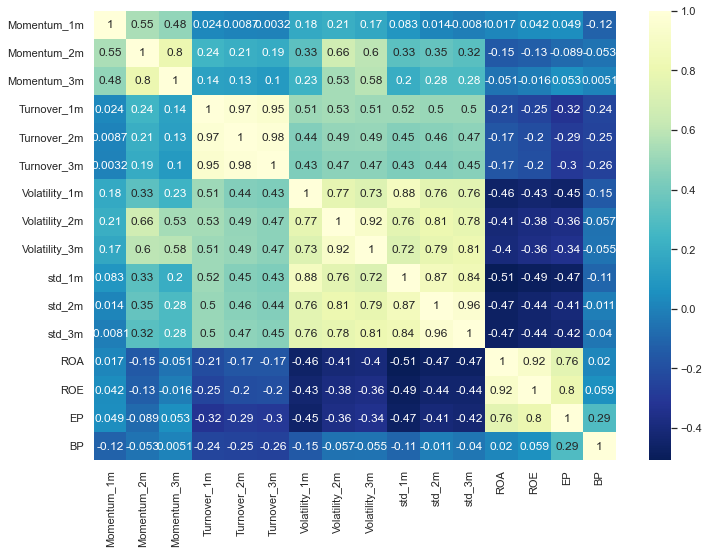

In [3]:
sample_data=Factors[Factors["Date"]=="2021-01-04"]
sample_data = sample_data[factors]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(sample_data.corr(), annot=True, cmap="YlGnBu_r")

In [4]:
merge_Factors = Factors.copy()
merge_Factors = merge_Factors[factors]
# merge factors with equal weight
merge_Factors["Turnover"] = (merge_Factors["Turnover_1m"] + merge_Factors["Turnover_2m"] + merge_Factors["Turnover_3m"])/3
merge_Factors["Volitility_2"] = (merge_Factors["Volatility_2m"] + merge_Factors["Volatility_3m"])/2
merge_Factors["Volitility_3"] = (merge_Factors["std_1m"] + merge_Factors["std_2m"] + merge_Factors["std_3m"])/3
merge_Factors["Financial Quality"] = (merge_Factors["ROA"] + merge_Factors["ROE"])/2
merge_Factors = merge_Factors.rename(columns={"Momentum_1m": 'Momentum_1', "Momentum_2m": 'Momentum_2', "Momentum_3m": 'Momentum_3', "Volatility_1m": 'Volitility_1'})


In [5]:
merge_factor = ["Momentum_1", "Momentum_2", "Momentum_3", "Turnover", "Volitility_1", "Volitility_2", "Volitility_3", "Financial Quality", "EP", "BP"]
merge_Factors = merge_Factors[merge_factor]
merge_Factors["Date"] = Factors["Date"]
merge_Factors["Index"] = Factors["Index"]
merge_Factors = merge_Factors.loc[:,["Date", "Index", "Momentum_1", "Momentum_2", "Momentum_3", "Turnover", "Volitility_1", "Volitility_2", "Volitility_3", "Financial Quality", "EP", "BP"]]

In [7]:
merge_Factors.to_csv("../Factors/merge_Factors.csv", index=False)